In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import re

### Since not every objectID has Images, the Met mueseum database needs to be filtered

In [43]:
# Reading in database; I already downloaded database and saved as csv
database = pd.read_csv('Metdbs.csv')
database.head()

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,11,12,13,14,15,22,23,24,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,objectID,isHighlight,accessionNumber,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,objectName,...,locus,excavation,river,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags
0,1,False,1979.486.1,False,NaN,NaN,[],"[{'role': 'Maker', 'name': 'James Barton Longa...",The American Wing,Coin,...,NaN,NaN,NaN,Metal,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/1,[]
1,2,False,1980.264.5,False,NaN,NaN,[],"[{'role': 'Maker', 'name': 'Christian Gobrecht'}]",The American Wing,Coin,...,NaN,NaN,NaN,Metal,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/2,[]
2,3,False,67.265.9,False,NaN,NaN,[],None,The American Wing,Coin,...,NaN,NaN,NaN,Metal,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/3,[]
3,4,False,67.265.10,False,NaN,NaN,[],None,The American Wing,Coin,...,NaN,NaN,NaN,Metal,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/4,[]
4,5,False,67.265.11,False,NaN,NaN,[],None,The American Wing,Coin,...,NaN,NaN,NaN,Metal,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/search/5,[]


#### There are 49 variables in the database

In [44]:
list(database)

['objectID',
 'isHighlight',
 'accessionNumber',
 'isPublicDomain',
 'primaryImage',
 'primaryImageSmall',
 'additionalImages',
 'constituents',
 'department',
 'objectName',
 'title',
 'culture',
 'period',
 'dynasty',
 'reign',
 'portfolio',
 'artistRole',
 'artistPrefix',
 'artistDisplayName',
 'artistDisplayBio',
 'artistSuffix',
 'artistAlphaSort',
 'artistNationality',
 'artistBeginDate',
 'artistEndDate',
 'objectDate',
 'objectBeginDate',
 'objectEndDate',
 'medium',
 'dimensions',
 'creditLine',
 'geographyType',
 'city',
 'state',
 'county',
 'country',
 'region',
 'subregion',
 'locale',
 'locus',
 'excavation',
 'river',
 'classification',
 'rightsAndReproduction',
 'linkResource',
 'metadataDate',
 'repository',
 'objectURL',
 'tags']

#### Making dataframe of only objectID that has Image

In [45]:
empty= []
for i in os.listdir('/sfs/lustre/bahamut/scratch/yl2vq/Resized'):
    if i.endswith('.jpg'):
        ID = i.split('.')[0]
        ID = int(ID)
        empty.append(ID)
small = pd.DataFrame({"objectID":empty})
small.head() #total 227979 (1 pynb checkpoint)

,objectID
0,683212
1,209031
2,632361
3,264926
4,443554


#### Left-joining the original dataframe and new dataframe consisting only objectID with Images

In [46]:
dbimg = pd.merge(small, database, how='left', on=['objectID'])
dbimg = dbimg.sort_values(by='objectID').reset_index().drop('index',axis=1)
dbimg.head()
# 227979 rows

,objectID,isHighlight,accessionNumber,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,objectName,...,locus,excavation,river,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags
0,34,False,1970.289.6,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'Forestville Manufa...",The American Wing,Clock,...,NaN,NaN,NaN,Furniture,NaN,NaN,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Landscapes', 'Boats']"
1,37,False,38.165.51,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,...,NaN,NaN,NaN,Ceramics,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men']"
2,38,False,38.165.50,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,['https://images.metmuseum.org/CRDImages/ad/or...,"[{'role': 'Maker', 'name': 'Pierre Stephan'}]",The American Wing,Figure,...,NaN,NaN,NaN,Ceramics,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"['Cannons', 'Swords', 'Men', 'Admirals']"
3,39,False,18.11.10,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],None,The American Wing,Advertisement,...,NaN,NaN,NaN,Natural Substances,NaN,NaN,2019-02-01T10:50:49.477Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,['Advertisements']
4,40,False,46.140.143,True,https://images.metmuseum.org/CRDImages/ad/orig...,https://images.metmuseum.org/CRDImages/ad/web-...,[],"[{'role': 'Maker', 'name': 'New England Glass ...",The American Wing,Ale glass,...,NaN,NaN,NaN,Glass,NaN,NaN,2019-07-31T03:00:40.447Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,[]


### Code for extracting Tags 

In [47]:
dbimg['tags'] = dbimg['tags'].astype(str)

In [48]:
lists = []
for i in range(len(dbimg)):
    if (len(dbimg['tags'][i]) > 2 and pd.isnull(dbimg['tags'][i]) != True and dbimg['tags'][i] != 'nan' and type(dbimg['tags'][i]) !=float):
        tag = dbimg['tags'][i]
        splitted = tag.split(',')
        for s in splitted:
            clean = re.sub('[^a-zA-Z]+', '', s)
            lists.append(clean)

In [49]:
print('There are total', len(lists), 'Tags')

There are total 313110 Tags


In [50]:
print('There are', len(np.unique(lists)), 'unique Tags')

There are 1039 unique Tags


In [51]:
lists = []
for i in range(len(dbimg)):
    if (len(dbimg['tags'][i]) > 2 and pd.isnull(dbimg['tags'][i]) != True and dbimg['tags'][i] != 'nan' and type(dbimg['tags'][i]) !=float):
        tag = dbimg['tags'][i]
        lists.append(tag)
len(lists)

150222

In [12]:
len(lists)/len(dbimg)*100

65.89291118918848

### The most frequently used Tags

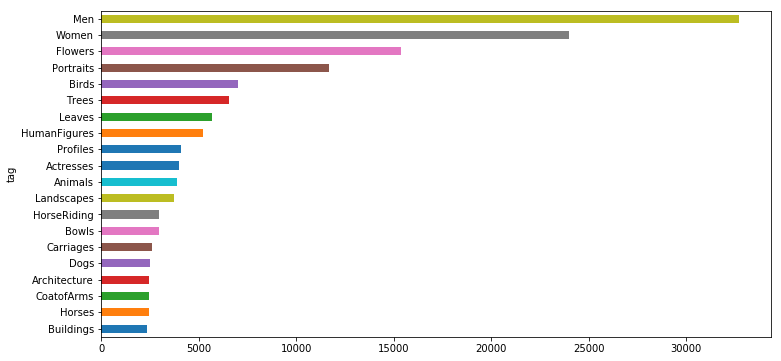

In [36]:
tags = pd.DataFrame({'tag':lists})
tags.groupby('tag').size().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,6))

In [ ]:
# Code for changing tag columns
ct=0
for i in range(len(dbimg)):
    if (len(dbimg['tags'][i]) > 2 and pd.isnull(dbimg['tags'][i]) != True and dbimg['tags'][i] != 'nan' and type(dbimg['tags'][i]) !=float):
        tag = dbimg['tags'][i]
        splitted = tag.split(',')
        empty=[]
        for s in splitted:
            clean = re.sub('[^a-zA-Z]+', '', s)
            empty.append(clean)
        dbimg['tags'][i] = empty
        ct+=1
        if ct % 1000 == 0:
            print (ct)

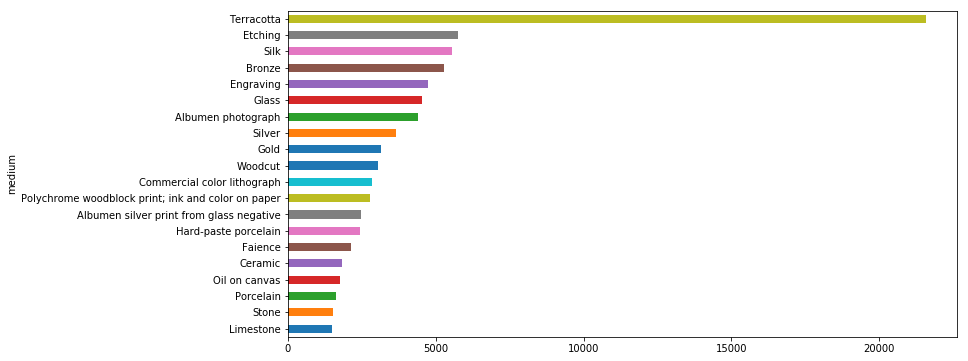

In [40]:
dbimg['objectID'].groupby(dbimg['medium']).size().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,6))

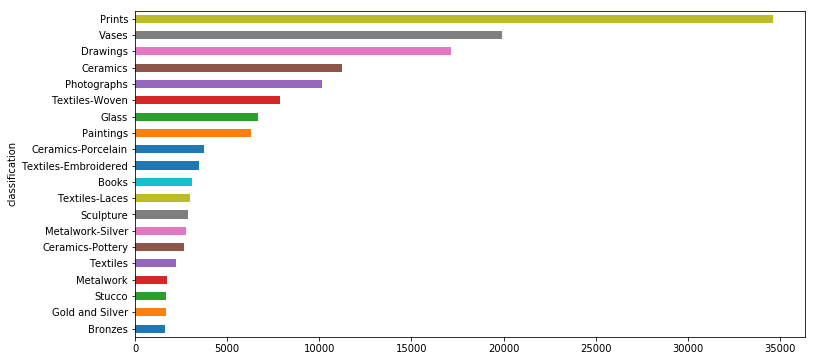

In [35]:
dbimg['objectID'].groupby(dbimg['classification']).size().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,6))

In [30]:
sum(pd.isnull(dbimg['country']))

176197

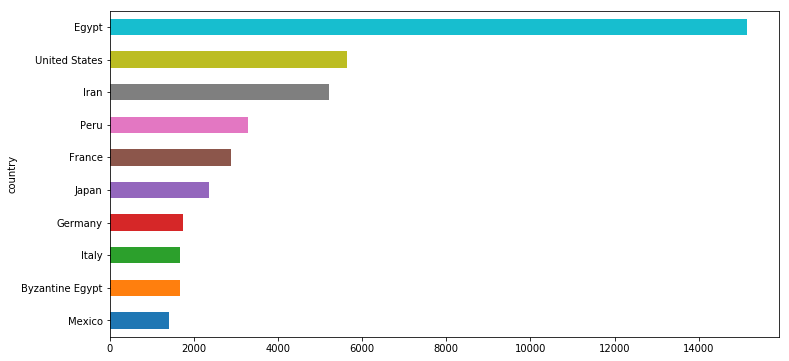

In [39]:
dbimg['objectID'].groupby(dbimg['country']).count().sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(12,6))

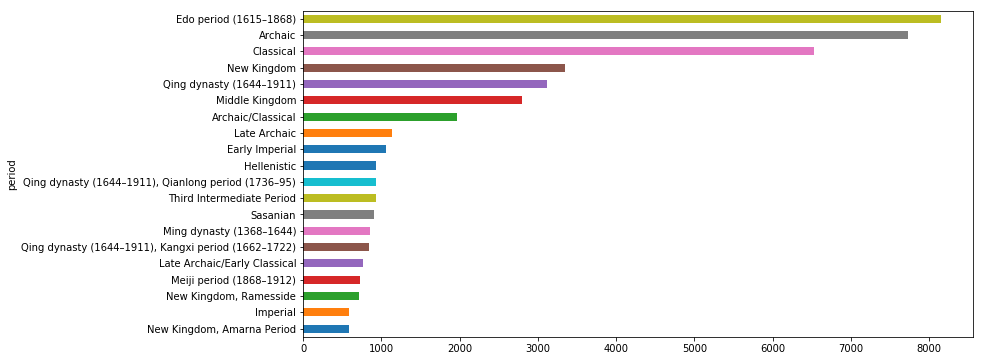

In [41]:
dbimg['objectID'].groupby(dbimg['period']).size().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,6))

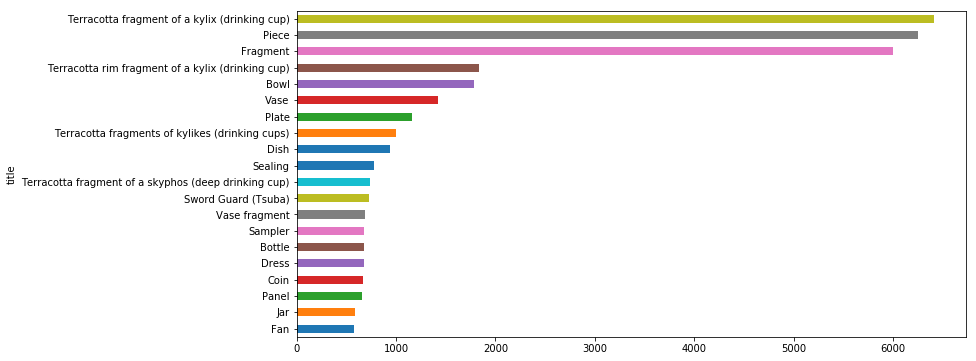

In [53]:
dbimg['objectID'].groupby(dbimg['title']).size().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,6))

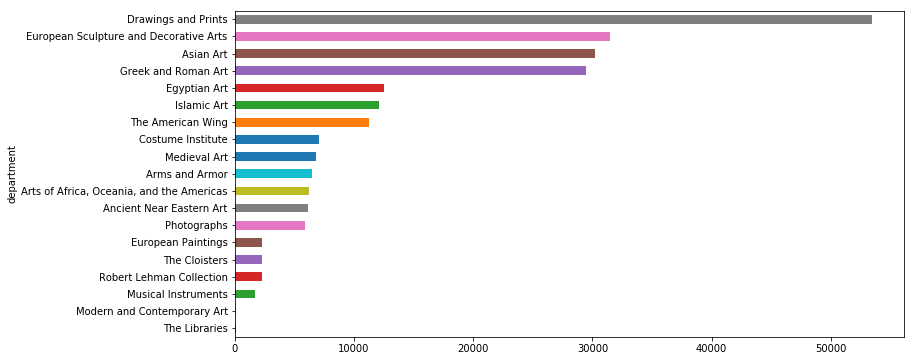

In [54]:
dbimg['objectID'].groupby(dbimg['department']).size().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,6))